# Eindimensionales Modell von zwei nicht wechselwirkenden Teilchen gefangen in einem beliebigen Potential

In diesem Notebook verwende ich die Finite-Differenzen-Methode um das Problem von zwei geladenen Teilchen in einem eindimensionalen Potential zu lösen. Bestimmte Parameter können verändert werden. Die standardmäßigen Einstellungen repräsentieren zwei Elektronen.

Das eindimensionale Einteilchenpotential kann beliebig gewählt werden. Vorprogrammiert gibt es 3 verschiedene Möglichkeiten das Potential zu wählen:
* unendlich tiefer Potentialtopf
* harmonisches Potential
* Doppelmuldenpotential

Die Quelldatein sind hier verfügbar:
https://github.com/steinerstephan/FDM-Zwei-Teilchen-in-eindimensionalen-Potential

## Programm

Zuerst werden die notwendigen Bibliotheken importiert.

In [185]:
import sys
import numpy as np
import scipy.linalg as la
from matplotlib import pyplot as plot

Hier definieren wir die Konstanten, die für die Berechnungen verwendet werden sollen. In diesem Programm verwenden wir die Hartee-Einheiten. Die Variable max_int wird nur für das Sortieren der Ergebnisse verwendet und hat daher keine physikalische Bedeutung in diesem Program.

In [186]:
MAX_INT = sys.maxsize
hbar = 1

Im nächsten Programmabschnitt werden die Eingangs-Parameter definiert, welche einerseits physikalische Eigenschaften des Systems verändern (Ladung und Masse) und andererseits die Genauigkeit der Simulation beeinflussen (Schrittweite und Anzahl der Punkte).

* step_size: Schrittweite
* number_of_data_points: Anzahl der Datenpunkte (die die Länge des Raumes bestimmt)
* mass: Masse der Teilchen (1 für Elektronen)

In [187]:
step_size = 0.08
number_of_data_points = 50 - 1
mass = 1

### Berechnung der kinetischen Energiematrix

In [188]:
# init kinetic matrix
kinetic = np.zeros((np.square(number_of_data_points), np.square(number_of_data_points)))

for i in range(np.square(number_of_data_points)):
    # set diagonal elements
    kinetic[i,i] = 4
    
    # set off diagonal elements
    if i >= number_of_data_points:
        kinetic[i,i-number_of_data_points] = -1
    if i < np.square(number_of_data_points)-number_of_data_points:
        kinetic[i,i+number_of_data_points] = -1
      
    if i % number_of_data_points == number_of_data_points-1:
        kinetic[i,i-1] = -1
    elif i % number_of_data_points == 0:
        kinetic[i,i+1] = -1
    else:
        kinetic[i,i-1] = -1
        kinetic[i,i+1] = -1
        
# add multiplier
kinetic_multiplier = np.square(hbar) / (2 * mass * np.square(step_size))
kinetic = kinetic * kinetic_multiplier

### Definition des Einteilchenpotentials und Berechnung der Matrix

In diesem Abschnitt wird das Einteilchenpotential für das Problem definiert.

In [189]:
# calculate length of the space
length = step_size * (number_of_data_points + 1)
# get discretized positions
x_positions = np.linspace(0, length, number_of_data_points)
# init potential array
potential_one_dimension = np.zeros(number_of_data_points)

# Harmonic Potential
if False:
    a = 60
    for i in range(len(x_positions)):
        potential_one_dimension[i] = a * np.square(x_positions[i] - length / 2)

# Double Well Potential
if False:
    a = 80
    c = 0.4
    for i in range(len(x_positions)):
        potential_one_dimension[i] = 50 + a * (c * np.power(x_positions[i] - length / 2, 4) - np.power(x_positions[i] - length / 2, 2))

# init potential matrix
potential = np.zeros((np.square(number_of_data_points), np.square(number_of_data_points)))

# get potential matrix form
if False:
    for j in range(number_of_data_points):
        for i in range(number_of_data_points):
            potential[j * number_of_data_points + i, j * number_of_data_points + i] = potential_one_dimension[i] + potential_one_dimension[j]

### Bildung des Hamiltonians und Lösung des Eigenwertproblems

In [190]:
# sum up energy components for hamiltonian
hamiltonian = kinetic + potential

# solve eigenvalue problem    
eigenvalues, eigenvectors = la.eig(hamiltonian)
# cast eigenvalues to real numbers
eigenvalues = np.real(eigenvalues)

### Information zur Ausgabe und Darstellung extrahieren

In [ ]:
# values for output
display_values = []
display_vectors = []

for i in range(41):
    # get index of smalles eigenvalue
    index = np.argmin(eigenvalues)
    
    # append value and vector to display arrays
    # and set value
    display_values.append(eigenvalues[index])
    display_vectors.append(eigenvectors[:,index].reshape((number_of_data_points, number_of_data_points)))
    
    # normalize vectors  
    sum = 0
    for k in range(number_of_data_points):
        for j in range(number_of_data_points):
            sum += display_vectors[i][k, j] * display_vectors[i][k, j] * step_size
            
    for k in range(number_of_data_points):
        for j in range(number_of_data_points):
            display_vectors[i][k, j] = display_vectors[i][k, j] / sum
    
    # set value in initial array to high number, so the next loop run will find the next bigger number
    eigenvalues[index] = MAX_INT

### Ausgabe der Energieeigenwerte

In [191]:
# print energy values of eigen states
for i in range(40):
    if i == 0:
        print('Ground State: ' + str(display_values[i]))
    else:
        print(str(i) + '. Excited State: ' + str(display_values[i]))

Ground State: 0.6166473661648837
1. Excited State: 1.5404016026949492
2. Excited State: 1.540401602695722
3. Excited State: 2.4641558392245537
4. Excited State: 3.0759407567243873
5. Excited State: 3.0759407567251813
6. Excited State: 3.9996949932545616
7. Excited State: 3.999694993255735
8. Excited State: 5.217204756734164
9. Excited State: 5.217204756734422
10. Excited State: 5.53523414728419
11. Excited State: 6.140958993263689
12. Excited State: 6.140958993264311
13. Excited State: 7.676498147293009
14. Excited State: 7.676498147293922
15. Excited State: 7.955743011964445
16. Excited State: 7.955743011965956
17. Excited State: 8.879497248494683
18. Excited State: 8.879497248495028
19. Excited State: 9.817762147301448
20. Excited State: 10.415036402524446
21. Excited State: 10.41503640252452
22. Excited State: 11.280747763042564
23. Excited State: 11.280747763044602
24. Excited State: 12.204501999572711
25. Excited State: 12.204501999572953
26. Excited State: 12.556300402532298
27. 

### Darstellung als Diagramme

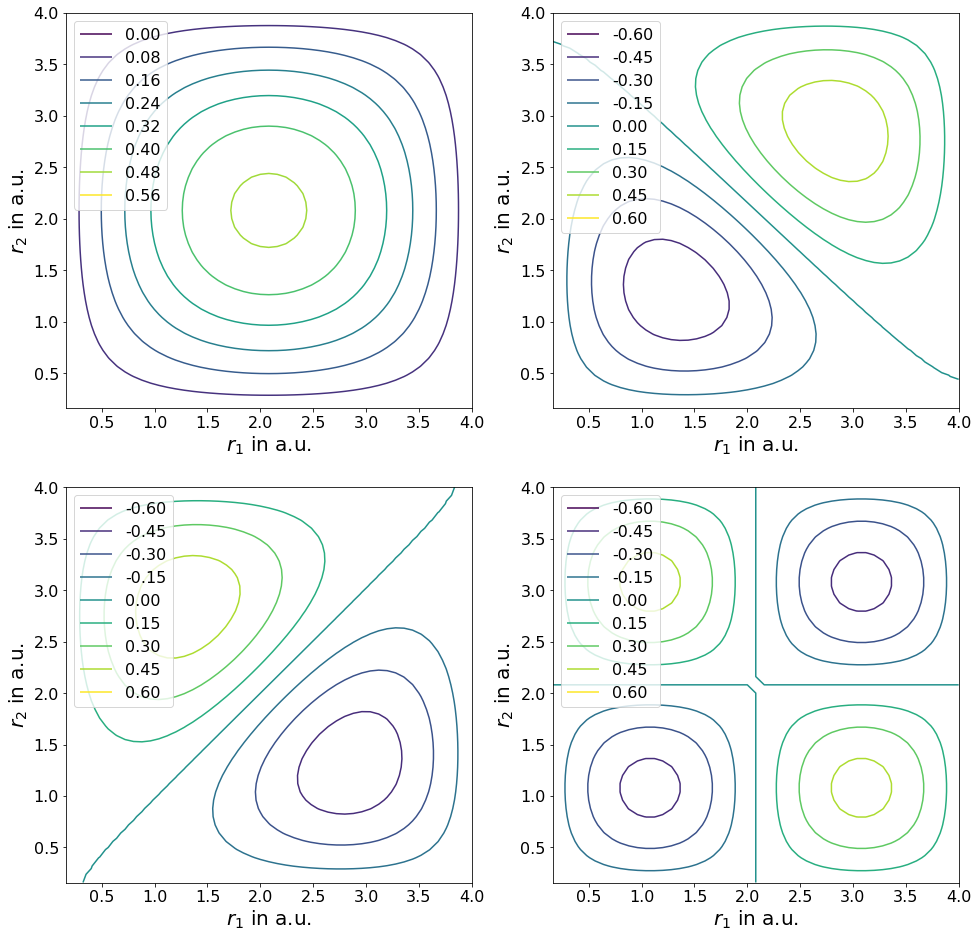

In [192]:
# init plots
fig, _ax = plot.subplots(nrows=2, ncols=2)
ax = _ax.flatten()

# set size of plot
fig.set_size_inches(16, 16)

# arrange data
x = y = np.arange(0, step_size * number_of_data_points, step_size)
X, Y = np.meshgrid(x + 0.16, y + 0.16)

for i in range(4):
    # set axis labels
    ax[i].set_xlabel('$r_1$ in a.u.', fontsize=20)
    ax[i].set_ylabel('$r_2$ in a.u.', fontsize=20)
    ax[i].tick_params(axis='both', which='major', labelsize=16)
    
    # draw plot
    CS = ax[i].contour(X, Y, display_vectors[i])
    
    # set legend
    h = CS.collections
    l = [f'{a:.2f}' for a in CS.levels]
    ax[i].legend(h, l, loc='upper left', fontsize=16)
    
plot.show()

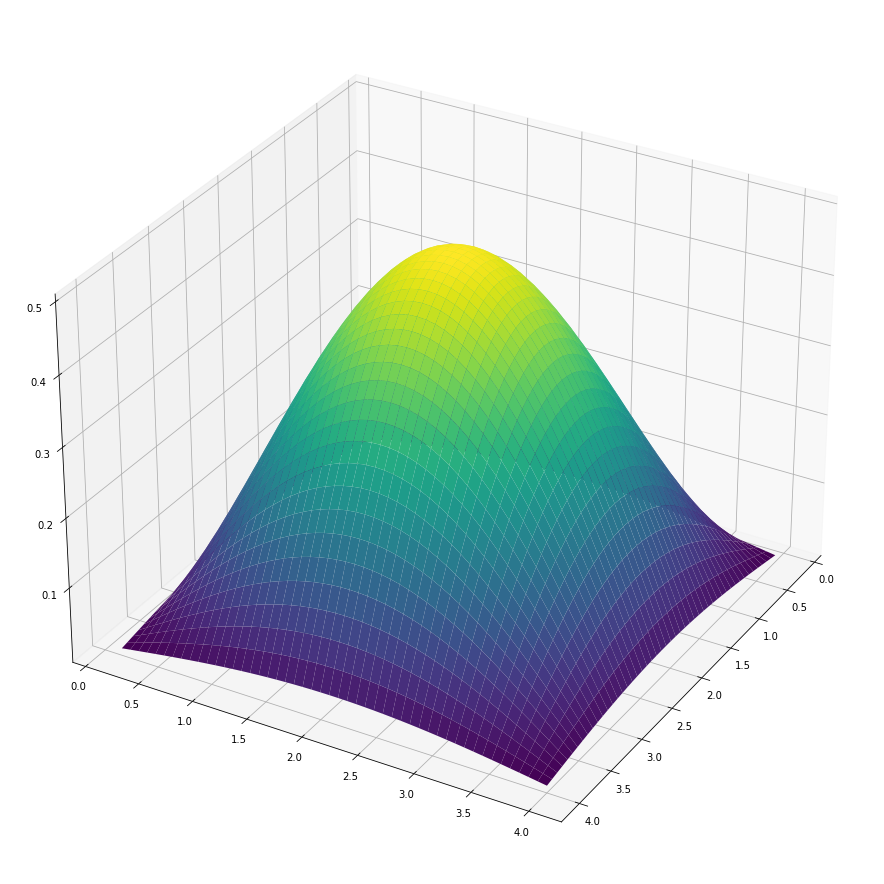

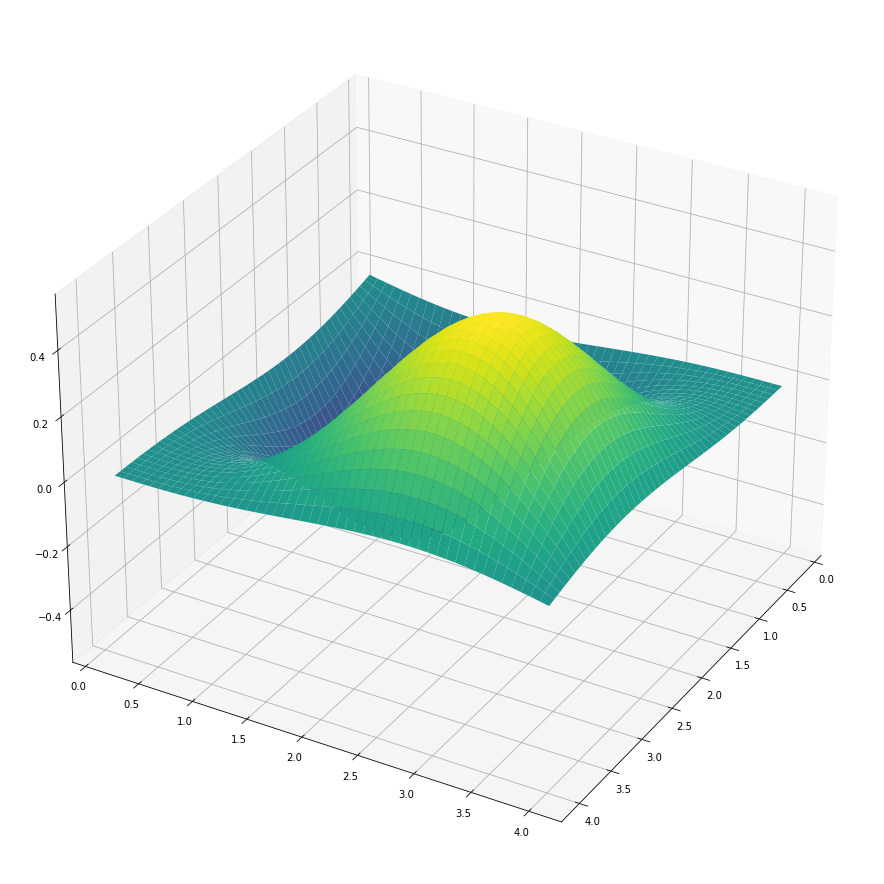

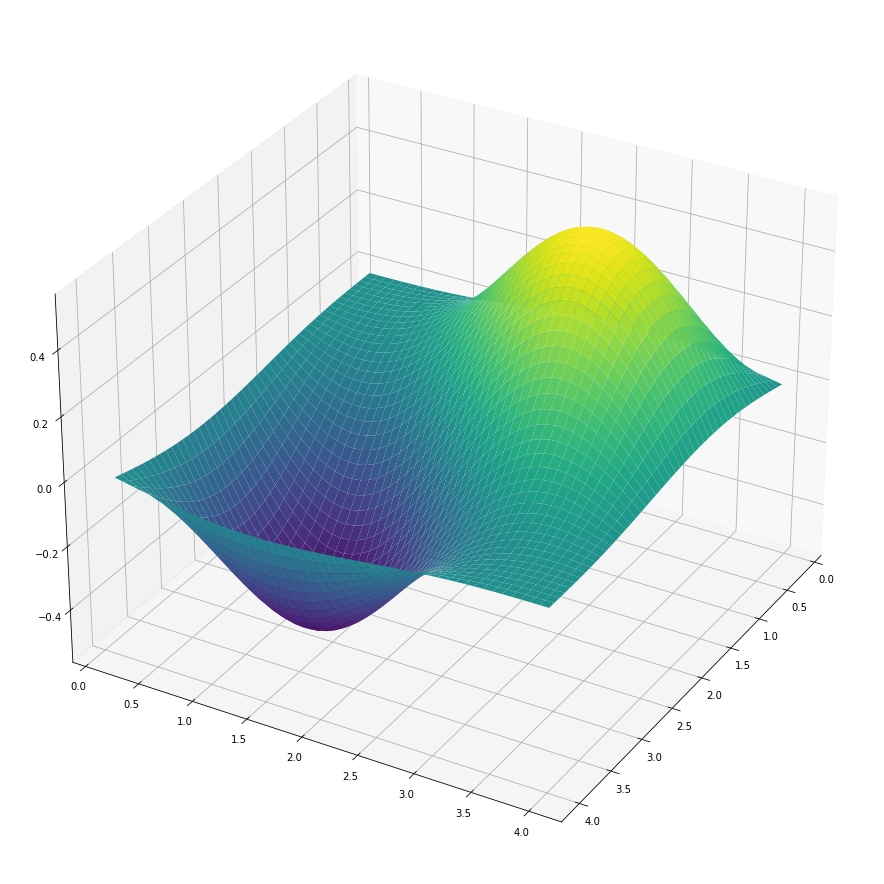

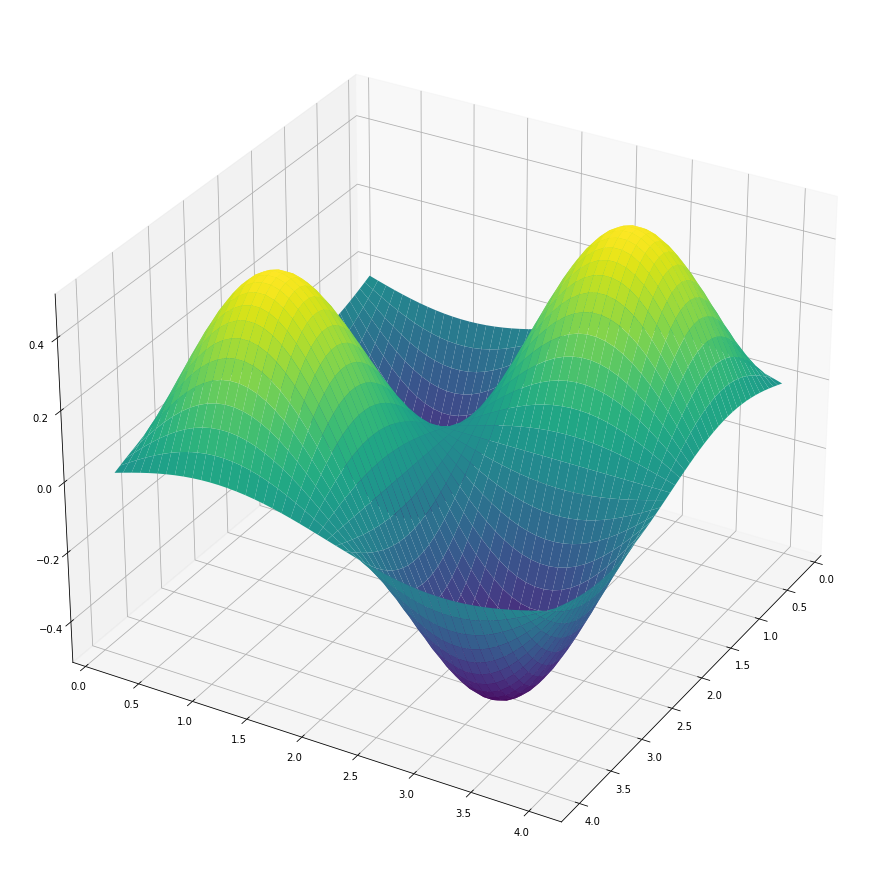

In [196]:
# plot eigenvectors in 3D
fig_2 = []
ax_2 = []

for i in range(4):
    # init plots
    fig_2.append(plot.figure())
    ax_2.append(plot.axes(projection='3d'))

    # set size of plot
    fig_2[i].set_size_inches(16, 16)

    # draw plot
    ax_2[i].plot_surface(X, Y, display_vectors[i], rstride=1, cstride=1, cmap='viridis', edgecolor='none')
    ax_2[i].view_init(30, 30)

### Berechnung und Darstellung der Paarkorrelationsfunktion¶

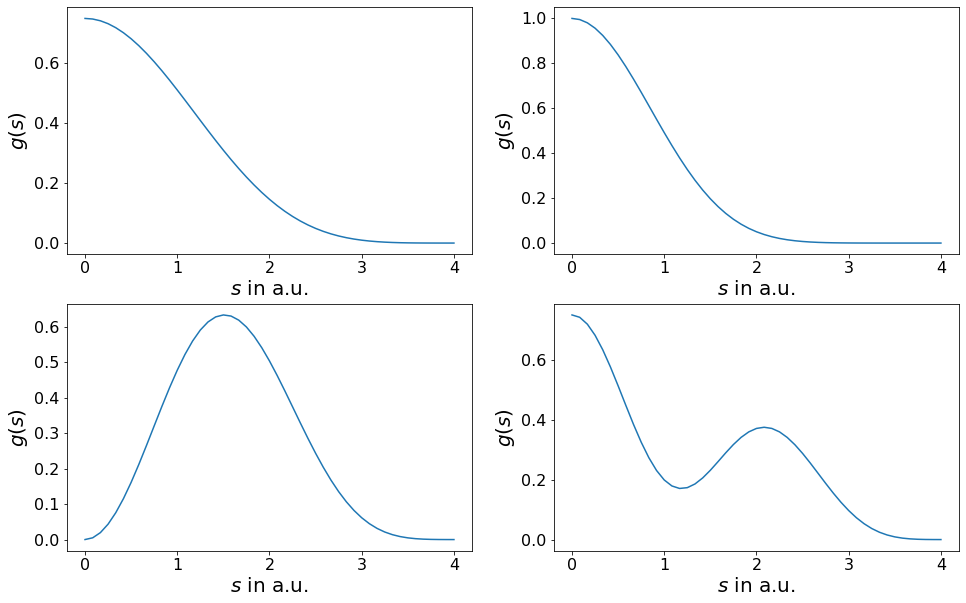

In [194]:
correlation_functions = []

# calculate pair correlation function
for k in range(6):
    for i in range(number_of_data_points):
        correlation_functions.append(np.zeros(number_of_data_points))

        for j in range(number_of_data_points):
            if (j + i) < number_of_data_points:
                correlation_functions[k][i] += display_vectors[k][j, j + i] * display_vectors[k][j, j + i] * step_size
            if (j - i) >= 0:
                correlation_functions[k][i] += display_vectors[k][j, j - i] * display_vectors[k][j, j - i] * step_size
    
# generate data for x axis / plot area
x = np.linspace(0, 4, number_of_data_points)
    
# init plots
fig, _ax = plot.subplots(nrows=2, ncols=2)
ax = _ax.flatten()

# set size of plot
fig.set_size_inches(16, 10)

for i in range(4):
    # draw plots
    ax[i].plot(x, correlation_functions[i])
    
    # set axis labels
    ax[i].set_xlabel('$s$ in a.u.', fontsize=20)
    ax[i].set_ylabel('$g(s)$', fontsize=20)
    ax[i].tick_params(axis='both', which='major', labelsize=16)

plot.show()